## ACKNOWLEDGMENT

Chat Generative Pre-trained Transformer 4o (OpenAI) was used for writing assistance by providing feedback on language and text structure, which was subsequently revised by critical appraisal from the author.

Statistics Table:
      BLEU Score   ROUGE-1    BLEURT
mean    0.009524  0.145535  0.308142
min     0.000000  0.000000  0.002431
max     0.177581  0.695652  0.678174
std     0.009977  0.081341  0.058387


/var/folders/2g/tztrhwks5s9_4gycqxprdgfc0000gn/T/ipykernel_16603/1938593773.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")


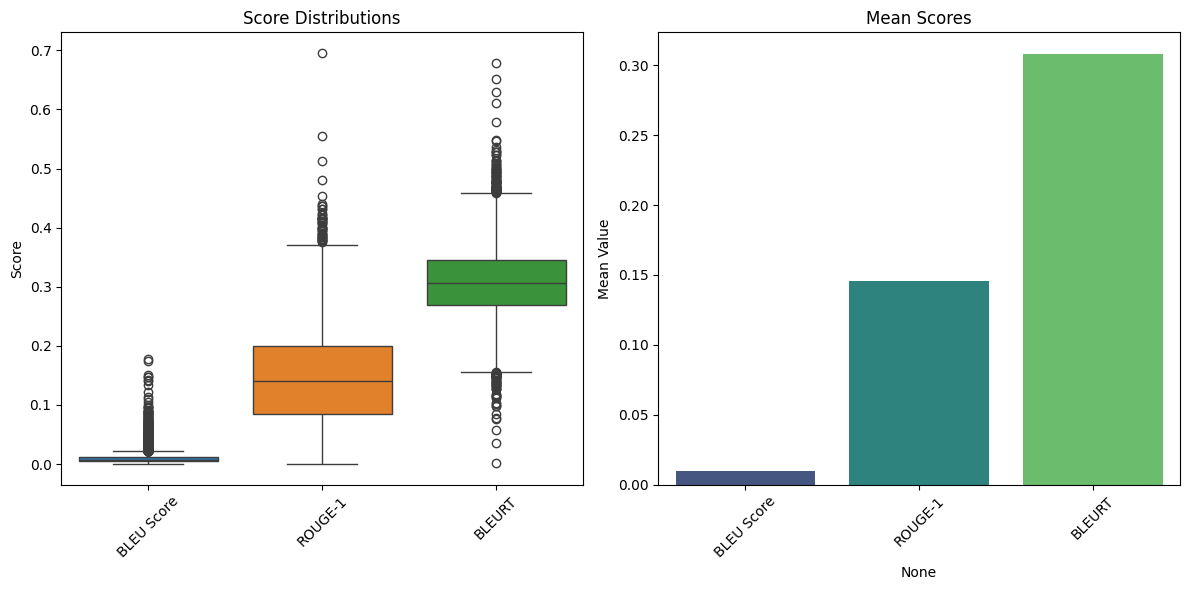

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
file_path = "llavaScores.csv"
df = pd.read_csv(file_path)

# Select the score columns
score_columns = ["BLEU Score", "ROUGE-1", "BLEURT"]

# Calculate statistics
stats = df[score_columns].describe().loc[["mean", "min", "max", "std"]]
print("Statistics Table:")
print(stats)

# Plot visualizations
plt.figure(figsize=(12, 6))

# Boxplot for score distributions
plt.subplot(1, 2, 1)
sns.boxplot(data=df[score_columns])
plt.title("Score Distributions")
plt.ylabel("Score")
plt.xticks(rotation=45)

# Bar plot for mean scores
plt.subplot(1, 2, 2)
mean_scores = df[score_columns].mean()
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")
plt.title("Mean Scores")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

Statistics Table:
          BLEU   ROUGE-1    BLEURT
mean  0.009271  0.114767  0.255688
min   0.000000  0.000000  0.008100
max   0.193385  0.490566  0.552820
std   0.010015  0.086627  0.067970


/var/folders/2g/tztrhwks5s9_4gycqxprdgfc0000gn/T/ipykernel_16603/1187521436.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")


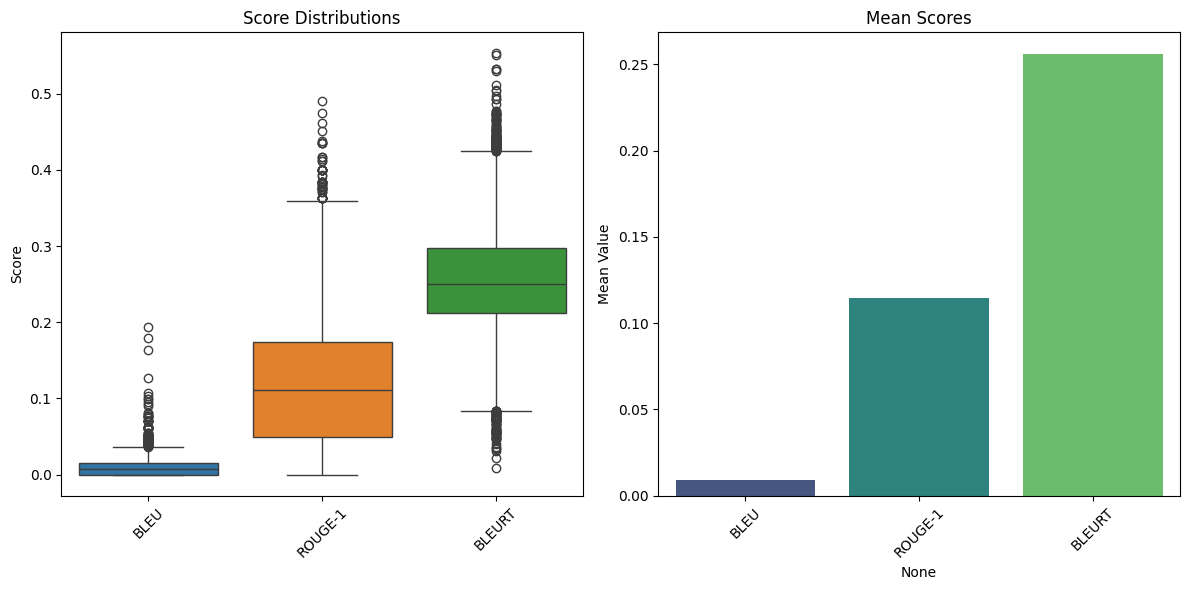

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
file_path = "randomForestScores.csv"
df = pd.read_csv(file_path)

# Select the score columns
score_columns = ["BLEU", "ROUGE-1", "BLEURT"]

# Calculate statistics
stats = df[score_columns].describe().loc[["mean", "min", "max", "std"]]
print("Statistics Table:")
print(stats)

# Plot visualizations
plt.figure(figsize=(12, 6))

# Boxplot for score distributions
plt.subplot(1, 2, 1)
sns.boxplot(data=df[score_columns])
plt.title("Score Distributions")
plt.ylabel("Score")
plt.xticks(rotation=45)

# Bar plot for mean scores
plt.subplot(1, 2, 2)
mean_scores = df[score_columns].mean()
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")
plt.title("Mean Scores")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

Statistics Table:
              BLEU Score   ROUGE-1    BLEURT BLEU Score ROUGE-1    BLEURT  \
                    mean      mean      mean        min     min       min   
Model                                                                       
LLaVA           0.009524  0.145535  0.308142        0.0     0.0  0.002431   
Random Forest   0.009271  0.114767  0.255688        0.0     0.0  0.008100   

              BLEU Score   ROUGE-1    BLEURT BLEU Score   ROUGE-1    BLEURT  
                     max       max       max        std       std       std  
Model                                                                        
LLaVA           0.177581  0.695652  0.678174   0.009977  0.081341  0.058387  
Random Forest   0.193385  0.490566  0.552820   0.010015  0.086627  0.067970  


/var/folders/2g/tztrhwks5s9_4gycqxprdgfc0000gn/T/ipykernel_16603/1248408873.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Model", y="BLEU Score", palette="Set2")


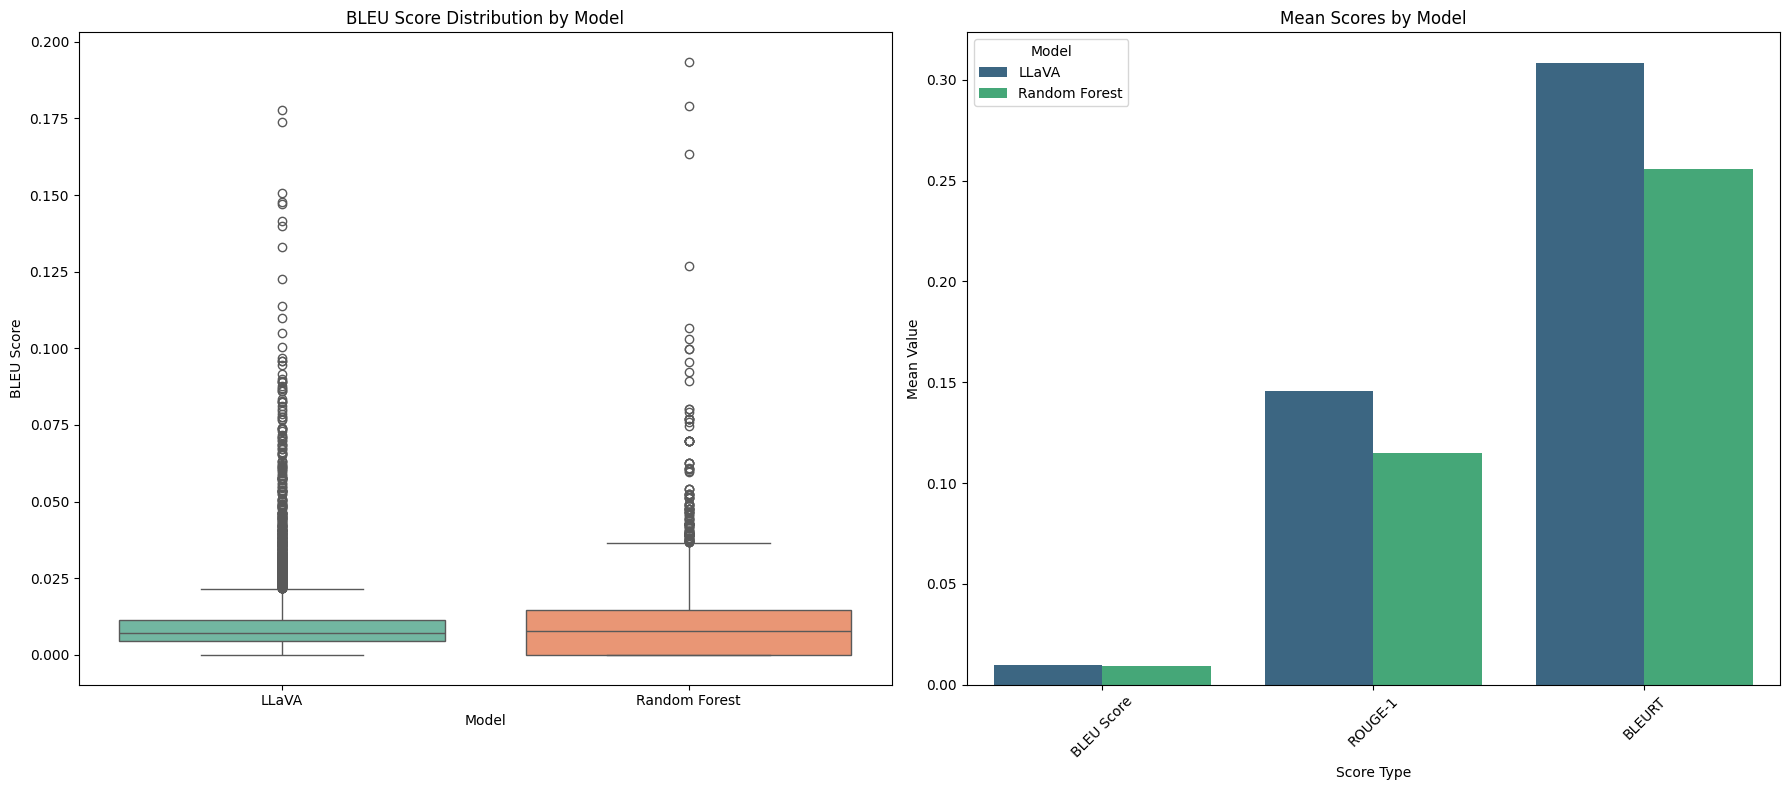

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
llava_file = "llavaScores.csv"
rf_file = "randomForestScores.csv"

llava_df = pd.read_csv(llava_file)
rf_df = pd.read_csv(rf_file)

# Rename the BLEU column in randomForestScores to match llavaScores
rf_df.rename(columns={"BLEU": "BLEU Score"}, inplace=True)

# Select the score columns
score_columns = ["BLEU Score", "ROUGE-1", "BLEURT"]

# Add a model identifier column to each DataFrame
llava_df["Model"] = "LLaVA"
rf_df["Model"] = "Random Forest"

# Combine the two DataFrames for comparison
combined_df = pd.concat([llava_df[score_columns + ["Model"]], rf_df[score_columns + ["Model"]]])

# Calculate statistics for each model
stats = combined_df.groupby("Model")[score_columns].describe().loc[:, (slice(None), ["mean", "min", "max", "std"])]
print("Statistics Table:")
print(stats)

# Plot visualizations
plt.figure(figsize=(18, 8))

# Boxplot for score distributions by model
plt.subplot(1, 2, 1)
sns.boxplot(data=combined_df, x="Model", y="BLEU Score", palette="Set2")
plt.title("BLEU Score Distribution by Model")
plt.ylabel("BLEU Score")

# Bar plot for mean scores by model
plt.subplot(1, 2, 2)
mean_scores = combined_df.groupby("Model")[score_columns].mean().reset_index()
mean_scores_melted = mean_scores.melt(id_vars="Model", var_name="Score Type", value_name="Mean Score")
sns.barplot(data=mean_scores_melted, x="Score Type", y="Mean Score", hue="Model", palette="viridis")
plt.title("Mean Scores by Model")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# List of file paths
file_paths = [
    "randomK1000rouge.csv",
    "randomK1000BLEURT.csv",
    "randomK1000BLEUscore.csv"
]

# Initialize an empty dictionary to store data
data = {}

# Loop through each file and extract the second column
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract the second column (index 1) and store it in the dictionary
    column_name = df.columns[1]  # Get the name of the second column
    data[column_name] = df.iloc[:, 1]  # Extract the second column

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Calculate statistics
stats = combined_df.describe().loc[["mean", "min", "max", "std"]]

# Print the statistics
print("Statistics Table:")
print(stats)

Statistics Table:
      evaluation_RandomForestK1000 - rouge_1  \
mean                                0.096650   
min                                 0.000000   
max                                 0.857143   
std                                 0.079936   

      evaluation_RandomForestK1000 - bleurt  \
mean                               0.245328   
min                                0.017723   
max                                0.481320   
std                                0.062252   

      evaluation_RandomForestK1000 - bleu_score  
mean                                   0.007598  
min                                    0.000000  
max                                    0.107669  
std                                    0.008914  


In [2]:
import pandas as pd
from bert_score import score

# Load the CSV file
file_path = "llavaScores.csv"
df = pd.read_csv(file_path)

# Extract the reference and generated captions
references = df["Reference Caption"].tolist()
generated = df["Generated Caption"].tolist()

# Calculate BERT scores
P, R, F1 = score(generated, references, lang="en", verbose=True)

# Add the BERT scores to the DataFrame
df["BERT Precision"] = P.tolist()
df["BERT Recall"] = R.tolist()
df["BERT F1"] = F1.tolist()

# Save the updated DataFrame to a new CSV file
df.to_csv("llavaScores_with_BERT.csv", index=False)

# Print a preview of the updated DataFrame
print(df.head())

/Users/erik.hafnor/.virtualenvs/DAT550/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 310/310 [08:34<00:00,  1.66s/it]


computing greedy matching.


100%|██████████| 156/156 [00:05<00:00, 26.61it/s]


done in 520.83 seconds, 19.06 sentences/sec
                           Imagefilepath  \
0  media/images/7dafc6fa2b0972eb3b07.png   
1  media/images/c85ecad02feca892a776.png   
2  media/images/db85b992efa237236365.png   
3  media/images/10ae07a205c99328002e.png   
4  media/images/e80e95da1cdb15b6ca4d.png   

                                   Reference Caption  \
0  ct chest axial view showing a huge ascending a...   
1  computed tomography ct shows floating thrombos...   
2  digitally subtracted angiogram demonstrates ac...   
3  digitally subtracted angiogram of the ima demo...   
4           angle measurement of a type number canal   

                                   Generated Caption  BLEU Score   ROUGE-1  \
0  the patients chest xray is negative for any ac...    0.006716  0.052632   
1  chest ct scan shows a bilateral pleural effusi...    0.007987  0.111111   
2  the medical image is a contrastenhanced ct sca...    0.004143  0.081081   
3  magnetic resonance imaging mri of the l

In [3]:
# Load the CSV file with BERT scores
file_path = "llavaScores_with_BERT.csv"
df = pd.read_csv(file_path)

# Select the BERT score columns
bert_score_columns = ["BERT Precision", "BERT Recall", "BERT F1"]

# Calculate statistics
bert_stats = df[bert_score_columns].describe().loc[["mean", "min", "max", "std"]]

# Print the statistics
print("BERT Score Statistics:")
print(bert_stats)

BERT Score Statistics:
      BERT Precision  BERT Recall   BERT F1
mean        0.823172     0.825629  0.824167
min         0.729340     0.704157  0.742534
max         0.939721     0.957012  0.938108
std         0.022419     0.026369  0.020156


In [4]:

# Load the CSV file
file_path = "randomForestScores.csv"
df = pd.read_csv(file_path)

# Extract the reference and generated captions
referencesRandomForest = df["Reference Caption"].tolist()
generatedRandomForest = df["Generated Caption"].tolist()

# Calculate BERT scores
P, R, F1 = score(generatedRandomForest, referencesRandomForest, lang="en", verbose=True)

# Add the BERT scores to the DataFrame
df["BERT Precision"] = P.tolist()
df["BERT Recall"] = R.tolist()
df["BERT F1"] = F1.tolist()

# Save the updated DataFrame to a new CSV file
df.to_csv("randomForestScores_with_BERT.csv", index=False)

# Print a preview of the updated DataFrame
print(df.head())

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 156/156 [03:55<00:00,  1.51s/it]


computing greedy matching.


100%|██████████| 156/156 [00:03<00:00, 51.07it/s]


done in 238.65 seconds, 41.60 sentences/sec
                           Imagefilepath  \
0  media/images/7dafc6fa2b0972eb3b07.png   
1  media/images/c85ecad02feca892a776.png   
2  media/images/db85b992efa237236365.png   
3  media/images/10ae07a205c99328002e.png   
4  media/images/e80e95da1cdb15b6ca4d.png   

                                   Reference Caption  \
0  CT chest axial view showing a huge ascending a...   
1  Computed tomography (CT) shows floating thromb...   
2  Digitally subtracted angiogram demonstrates ac...   
3  Digitally subtracted angiogram of the IMA demo...   
4               Angle measurement of a Type 1 canal.   

                                   Generated Caption      BLEU   ROUGE-1  \
0  5.1 cm x 3.4 cm x 4 cm multiloculated hepatic ...  0.000000  0.000000   
1  Computed tomography of the head on Day 22 show...  0.019076  0.256410   
2  Computed tomography of the head on Day 22 show...  0.015171  0.166667   
3  Computed tomography of the head on Day 22 show.

In [7]:
# Load the CSV file with BERT scores
file_path = "randomForestScores_with_BERT.csv"
df = pd.read_csv(file_path)

# Select the BERT score columns
bert_score_columns = ["BERT Precision", "BERT Recall", "BERT F1"]

# Calculate statistics
bert_stats = df[bert_score_columns].describe().loc[["mean", "min", "max", "std"]]

# Print the statistics
print("BERT Score Statistics:")
print(bert_stats)

BERT Score Statistics:
      BERT Precision  BERT Recall   BERT F1
mean        0.838932     0.832240  0.835148
min         0.749206     0.707041  0.752368
max         0.934228     0.955351  0.914683
std         0.029163     0.026770  0.020688


In [9]:
# Process LLaVA dataset
llava_file_path = "llavaScores_with_BERT.csv"
llava_df = pd.read_csv(llava_file_path)

llava_max_f1_row = llava_df.loc[llava_df["BERT F1"].idxmax()]
llava_min_f1_row = llava_df.loc[llava_df["BERT F1"].idxmin()]
llava_mean_f1_value = llava_df["BERT F1"].mean()
llava_mean_f1_row = llava_df.iloc[(llava_df["BERT F1"] - llava_mean_f1_value).abs().idxmin()]

print("\nLLaVA - Generated and Reference Captions with Max BERT F1:")
print("Generated Caption:", llava_max_f1_row["Generated Caption"])
print("Reference Caption:", llava_max_f1_row["Reference Caption"])

# Process Random Forest dataset
rf_file_path = "randomForestScores_with_BERT.csv"
rf_df = pd.read_csv(rf_file_path)

rf_max_f1_row = rf_df.loc[rf_df["BERT F1"].idxmax()]
rf_min_f1_row = rf_df.loc[rf_df["BERT F1"].idxmin()]
rf_mean_f1_value = rf_df["BERT F1"].mean()
rf_mean_f1_row = rf_df.iloc[(rf_df["BERT F1"] - rf_mean_f1_value).abs().idxmin()]

print("\nRandom Forest - Generated and Reference Captions with Max BERT F1:")
print("Generated Caption:", rf_max_f1_row["Generated Caption"])
print("Reference Caption:", rf_max_f1_row["Reference Caption"])


LLaVA - Generated and Reference Captions with Max BERT F1:
Generated Caption: the chest xray shows bilateral pneumonia congestion with pleural effusion and calcified pericardium
Reference Caption: chest radiography showing calcified pericardium pulmonary congestion and pleural effusions

Random Forest - Generated and Reference Captions with Max BERT F1:
Generated Caption: Previous CT scan of abdomen showing two pseudocysts in the pancreatic tail (white arrows).
Reference Caption: Brain CT revealing mild thickening of the bilateral optic nerves (black arrows).


In [10]:
def print_max_min_mean_captions(file_path, model_name):
    df = pd.read_csv(file_path)
    
    max_f1_row = df.loc[df["BERT F1"].idxmax()]
    min_f1_row = df.loc[df["BERT F1"].idxmin()]
    mean_f1_value = df["BERT F1"].mean()
    mean_f1_row = df.iloc[(df["BERT F1"] - mean_f1_value).abs().idxmin()]
    
    print(f"\n{model_name} - Generated and Reference Captions with Max BERT F1:")
    print("Generated Caption:", max_f1_row["Generated Caption"])
    print("Reference Caption:", max_f1_row["Reference Caption"])
    
    print(f"\n{model_name} - Generated and Reference Captions with Min BERT F1:")
    print("Generated Caption:", min_f1_row["Generated Caption"])
    print("Reference Caption:", min_f1_row["Reference Caption"])
    
    print(f"\n{model_name} - Generated and Reference Captions Closest to Mean BERT F1:")
    print("Generated Caption:", mean_f1_row["Generated Caption"])
    print("Reference Caption:", mean_f1_row["Reference Caption"])

# Call the function for each dataset
print_max_min_mean_captions("llavaScores_with_BERT.csv", "LLaVA")
print_max_min_mean_captions("randomForestScores_with_BERT.csv", "Random Forest")


LLaVA - Generated and Reference Captions with Max BERT F1:
Generated Caption: the chest xray shows bilateral pneumonia congestion with pleural effusion and calcified pericardium
Reference Caption: chest radiography showing calcified pericardium pulmonary congestion and pleural effusions

LLaVA - Generated and Reference Captions with Min BERT F1:
Generated Caption: the ct scan of the abdomen shows a small nodular lesion with calcification in the right lobe of the liver which may require further evaluation for malignancy or benignity
Reference Caption: cholelithiasis

LLaVA - Generated and Reference Captions Closest to Mean BERT F1:
Generated Caption: the medical image depicts a unilateral hip replacement with visible screws in the femur head and acetabular reconstruction the presence of hardware indicates the implantation of prosthetic components to replace damaged or diseased bone
Reference Caption: periprosthetic femoral fracture with stem mobilization

Random Forest - Generated and 

In [11]:
def print_max_min_mean_captions(file_path, model_name):
    df = pd.read_csv(file_path)
    
    max_f1_row = df.loc[df["BERT F1"].idxmax()]
    min_f1_row = df.loc[df["BERT F1"].idxmin()]
    mean_f1_value = df["BERT F1"].mean()
    mean_f1_row = df.iloc[(df["BERT F1"] - mean_f1_value).abs().idxmin()]
    
    print(f"\n{model_name} - Generated and Reference Captions with Max BERT F1:")
    print("Generated Caption:", max_f1_row["Generated Caption"])
    print("Reference Caption:", max_f1_row["Reference Caption"])
    print("BERT F1 Score:", max_f1_row["BERT F1"])
    
    print(f"\n{model_name} - Generated and Reference Captions with Min BERT F1:")
    print("Generated Caption:", min_f1_row["Generated Caption"])
    print("Reference Caption:", min_f1_row["Reference Caption"])
    print("BERT F1 Score:", min_f1_row["BERT F1"])
    
    print(f"\n{model_name} - Generated and Reference Captions Closest to Mean BERT F1:")
    print("Generated Caption:", mean_f1_row["Generated Caption"])
    print("Reference Caption:", mean_f1_row["Reference Caption"])
    print("BERT F1 Score:", mean_f1_row["BERT F1"])

# Call the function for each dataset
print_max_min_mean_captions("llavaScores_with_BERT.csv", "LLaVA")
print_max_min_mean_captions("randomForestScores_with_BERT.csv", "Random Forest")


LLaVA - Generated and Reference Captions with Max BERT F1:
Generated Caption: the chest xray shows bilateral pneumonia congestion with pleural effusion and calcified pericardium
Reference Caption: chest radiography showing calcified pericardium pulmonary congestion and pleural effusions
BERT F1 Score: 0.9381080865859984

LLaVA - Generated and Reference Captions with Min BERT F1:
Generated Caption: the ct scan of the abdomen shows a small nodular lesion with calcification in the right lobe of the liver which may require further evaluation for malignancy or benignity
Reference Caption: cholelithiasis
BERT F1 Score: 0.7425336837768555

LLaVA - Generated and Reference Captions Closest to Mean BERT F1:
Generated Caption: the medical image depicts a unilateral hip replacement with visible screws in the femur head and acetabular reconstruction the presence of hardware indicates the implantation of prosthetic components to replace damaged or diseased bone
Reference Caption: periprosthetic fem

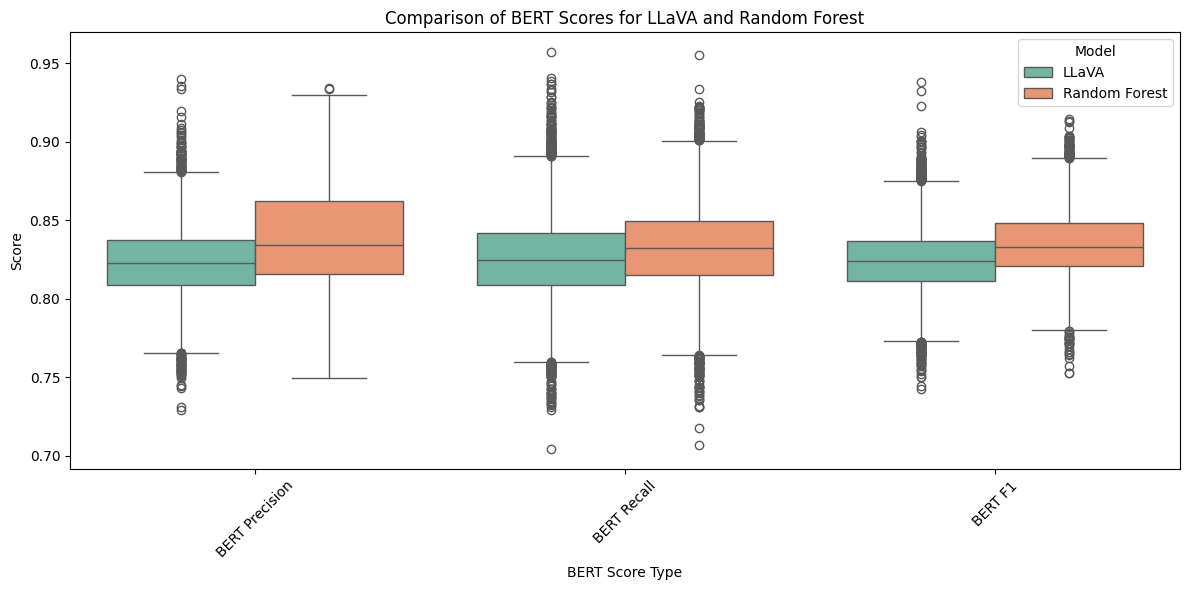

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
llava_file = "llavaScores_with_BERT.csv"
rf_file = "randomForestScores_with_BERT.csv"

llava_df = pd.read_csv(llava_file)
rf_df = pd.read_csv(rf_file)

# Add a model identifier column to each DataFrame
llava_df["Model"] = "LLaVA"
rf_df["Model"] = "Random Forest"

# Combine the two DataFrames
combined_df = pd.concat([llava_df, rf_df])

# Select the BERT score columns
bert_score_columns = ["BERT Precision", "BERT Recall", "BERT F1"]

# Melt the DataFrame for easier plotting
melted_df = combined_df.melt(id_vars=["Model"], value_vars=bert_score_columns, 
                             var_name="BERT Score Type", value_name="Score")

# Create a boxplot for BERT scores by model
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x="BERT Score Type", y="Score", hue="Model", palette="Set2")
plt.title("Comparison of BERT Scores for LLaVA and Random Forest")
plt.ylabel("Score")
plt.xlabel("BERT Score Type")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.show()